In [30]:
import json
import csv
import sys

db = 49220

def szures(s):
	s = s.lower()
	s = s.replace("\u00e0", "a")
	s = s.replace("\u0103", "a")
	s = s.replace("\u00e1", "a")
	s = s.replace("\u00e2", "a")
	s = s.replace("\u0391", "a")
	s = s.replace("\u03b1", "a")
	
	s = s.replace("\u00e9", "e")
	s = s.replace("\u00e8", "e")
	
	s = s.replace("\u00ed", "i")
	s = s.replace("\u00ec", "i")
	s = s.replace("\u00ee", "i")
	
	s = s.replace("\u00f3", "o")
	s = s.replace("\u00f6", "o")
	s = s.replace("\u0151", "o")
	s = s.replace("\u039f", "o")
	
	s = s.replace("\u039b", "l")
	
	s = s.replace("\u00fa", "u")
	s = s.replace("\u0171", "u")
	s = s.replace("\u00fc", "u")
	s = s.replace("\u016b", "u")
	
	s = s.replace("\u015f", "s")
	s = s.replace("\u0219", "s")
	
	s = s.replace("\u021b", "t")
	s = s.replace("\u0163", "t")
	
	s = s.replace("\u0e4f", "")
	s = s.replace("\u032f", "")
	s = s.replace("\u0361", "")
	
	s = s.encode('ascii', 'ignore').decode('utf8')
	
	return s

with open("proba.txt") as f:
	s = f.read()
s = szures(s)
data = json.loads(s)

print(data[:5])


[{'id': 0, 'birth': 'keresztur', 'name': 'boholt lore', 'studwhere': 'orbán balázs gimnázium, székelykeresztúr', 'livesin': 'szèkelykeresztur, harghita, romania'}, {'id': 1, 'livesin': 'csikszentdomokos', 'other1': 'venczel józsef iskolaközpont - csíkszereda', 'birth': 'csikszereda', 'name': 'nelut kémenes'}, {'marriedto': 'péterfy eniko', 'studwhere': 'none', 'livesin': 'angyalföld, budapest, hungary', 'workwhere': 'drogmentes világért alapítvány - magyarország', 'name': 'kovács iulia', 'birth': 'udvarhely', 'id': 2, 'workwhat': 'helyettes ügyvezető'}, {'id': 3, 'name': 'monica-ana szep', 'birth': 'barot', 'livesin': 'budapest, hungary'}, {'birth': 'szentgyorgy', 'name': 'matei szabolcs', 'marriedto': 'lászló tünde', 'id': 4}]


In [31]:
def count_occurence_of(col):

    dict = {}
    for i in data:
        if col in i:
            b = szures(i[col])
            if b in dict:
                dict[b] = dict[b] + 1
            else:
                dict[b] = 1
    return dict

birth_cities_count = count_occurence_of("birth")
print(birth_cities_count)

{'keresztur': 2830, 'csikszereda': 3508, 'udvarhely': 3310, 'barot': 2335, 'szentgyorgy': 3494, 'kezdi': 3384, 'kovaszna': 3915, 'szovata': 1522, 'vasarhely': 3823, 'gyergyo': 3461, 'vlahica': 2329, 'segesvar': 2539, 'kolozsvar': 3942, 'balan': 2312, 'regen': 2770, 'toplita': 2564, 'parajd': 1182}


In [32]:
birth_cities = list(birth_cities_count.keys())

stud_dict = dict.fromkeys(birth_cities,0)
for i in data:
    if "studwhere" in i:
        if i["studwhere"] != "None":
            city = i["birth"]
            stud_dict[city] = stud_dict[city] + 1

work_dict = dict.fromkeys(birth_cities,0)            
for i in data:
    if "workwhere" in i or "workwhat" in i:
        city = i["birth"]
        work_dict[city] = work_dict[city] + 1

print(stud_dict)
print(work_dict)

{'keresztur': 1313, 'csikszereda': 1605, 'udvarhely': 1518, 'barot': 1124, 'szentgyorgy': 1623, 'kezdi': 1609, 'kovaszna': 1880, 'szovata': 664, 'vasarhely': 1720, 'gyergyo': 1477, 'vlahica': 964, 'segesvar': 1124, 'kolozsvar': 1767, 'balan': 956, 'regen': 1180, 'toplita': 1192, 'parajd': 459}
{'keresztur': 1585, 'csikszereda': 1777, 'udvarhely': 1673, 'barot': 1258, 'szentgyorgy': 1900, 'kezdi': 1741, 'kovaszna': 2081, 'szovata': 741, 'vasarhely': 2065, 'gyergyo': 1700, 'vlahica': 1132, 'segesvar': 1335, 'kolozsvar': 2235, 'balan': 1107, 'regen': 1436, 'toplita': 1341, 'parajd': 611}


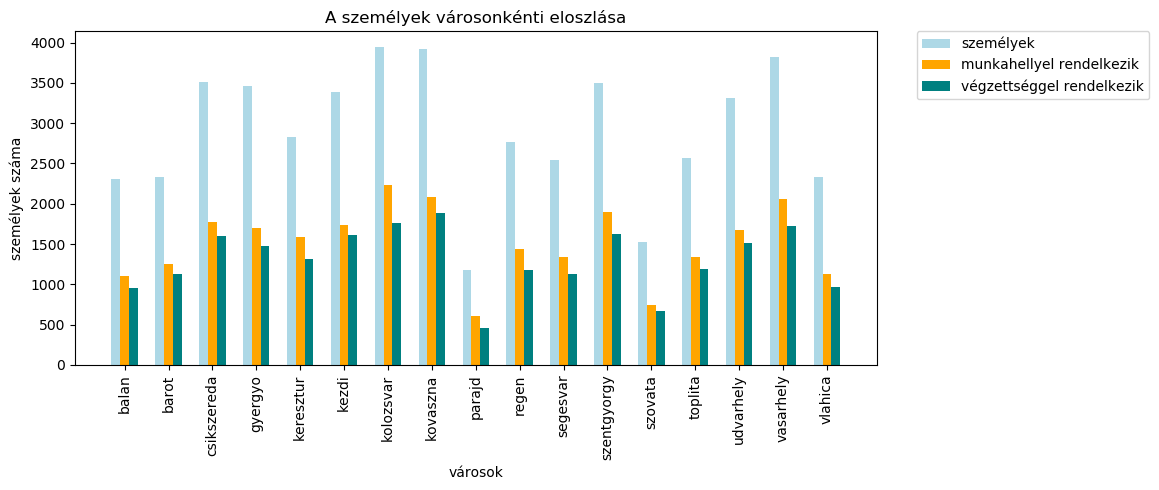

('balan', 'barot', 'csikszereda', 'gyergyo', 'keresztur', 'kezdi', 'kolozsvar', 'kovaszna', 'parajd', 'regen', 'segesvar', 'szentgyorgy', 'szovata', 'toplita', 'udvarhely', 'vasarhely', 'vlahica')


In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 5), dpi=100)

birth_list = sorted(birth_cities_count.items())
stud_list = sorted(stud_dict.items())
work_list = sorted(work_dict.items())
x1, y1 = zip(*birth_list)
x2, y2 = zip(*work_list)
x3, y3 = zip(*stud_list)

bar_width = 0.2
index = np.arange(17)

bar1 = plt.bar(index, y1, bar_width, color='lightblue', label='személyek')
bar2 = plt.bar(index + 0.2, y2, bar_width, color='orange', label='munkahellyel rendelkezik')
bar3 = plt.bar(index + 0.4, y3, bar_width, color='teal', label='végzettséggel rendelkezik')


plt.xticks([i + 0.2 for i in range(17)],sorted(birth_cities), rotation=90)
plt.xlabel("városok")
plt.ylabel("személyek száma")
plt.title("A személyek városonkénti eloszlása")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()
print(x1)

In [34]:
schools = count_occurence_of("studwhere")
s = [(k, schools[k]) for k in sorted(schools, key=schools.get, reverse=True)]
#for key, el in s:
 #   print(key, el)

In [35]:
workwhat = count_occurence_of("workwhat")
#for key, el in jobs.items():
 #   print(key, el)

In [36]:
def studdict(s):
    if "miko" in s: return u"Székely Mikó Kollégium, Sepsiszentgyörgy"
    elif "mikes" in s: return u"Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy"
    elif "nagy mozes" in s: return  u"Nagy Mózes Elméleti Líceum, Kézdivásárhely"
    elif "orban balazs" in s: return u"Orbán Balázs Gimnázium, Székelykeresztúr"
    elif "gabor aron" in s: return u"Gábor Áron Szakképző Líceum, Kézdivásárhely"
    elif "marton" in s \
        or "márton" in s: return u"Márton Áron Főgimnázium, Csíkszereda"
    elif "joannes kajoni" in s: return u"Joannes Kájoni Szakközépiskola, Csíkszereda"
    elif "tamasi aron" in s \
        or "egeszsegugyi foiskola szekelyudvarhely" in s \
        or "egeszsegugyi liceum" in s \
        or "aron egeszsegugyi" in s: return u"Tamási Áron Gimnázium, Székelyudvarhely"
    elif "nagy istvan " in s: return u"Nagy István Művészeti Líceum, Csíkszereda"
    elif "baroti szabo david" in s: return u"Baróti Szabó Dávid Iskolaközpont, Barót"
    elif "apor peter" in s: return u"Apor Péter Iskolaközpont, Kézdivásárhely"
    elif "liviu rebreanu balan" in s \
        or "grup scolar \"liviu rebreanu\"" in s: return u"Liviu Rebreanu Szakközépiskola, Balánbánya"
    elif "zeyk domokos" in s: return u"Székelykeresztúri Zeyk Domokos Iskolaközpont"
    elif "puskas tivadar szakkozepiskola" in s \
        or "puskas tivadar liceum sepsiszentgyorgy" in s: return u"Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy"
    elif "colegiul national \"mihai eminescu\"" in s \
        or "colegiul national mihai eminescu toplita" in s \
        or "colegiul national mihai eminescu,toplita,harghita" in s: return u"Colegiul National Mihai Eminescu, Maroshévíz"
    elif "gepgyarto iskolakozpont" in s: return u"Gépgyártó Iskolaközpont, Gyergyószentmiklós"
    elif "banyai janos" in s: return u"Bányai János Szakközépiskola, Székelyudvarhely"
    elif "batthyany ignac technikai kollegium" in s: return u"Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós"
    elif "grup scolar agricol sighisoara" in s: return u"Grup Școlar AgricoL, Segesvár"
    elif "aprily lajos" in s: return u"Áprily Lajos Főgimnázium, Brassó"
    elif "koss karoly" in s \
        or "kos karoly" in s: return u"Kós Károly Szakközépiskola, Székelyudvarhely"
    elif "bod peter tanitokepzo - kezdivasarhely" in s: return u"Bod Péter Tanítóképző, Kézdivásárhely"
    elif "berde mozes unitarius gimnazium" in s: return u"Berde Mózes Unitárius Gimnázium, Székelykeresztúr"
    elif "taslauanu" in s: return u"Liceul Teoretic O. C. Taslauanu, Maroshévíz"
    elif "szovatai liceum" in s \
        or "domokos kazmer" in s: return u"Domokos Kázmér Iskolacsoport, Szováta"
    elif "salamon erno" in s: return u"Salamon Ernő Elméleti Líceum, Gyergyószentmiklós"
    elif "gaal mozes" in s: return u"Gaál Mózes Általános Iskola, Barót"
    elif "berde aron" in s: return u"Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy"
    elif "segito maria romai katolikus gimnazium" in s: return u"Segítő Mária Római Katolikus Gimnázium, Csíkszereda"
    elif "plugor sandor" in s: return u"Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy"
    elif "korosi csoma sandor kovaszna" in s: return u"Kőrösi Csoma Sándor Líceum, Kovászna"
    elif "bolyai farkas" in s: return u"Bolyai Farkas Elméleti Líceum, Marosvásárhely"
    elif "egeszsegugyi technikum csikszereda" in s: return u"Egészségügyi Technikum, Csíkszereda"
    elif "nagy imre" in s: return u"Nagy Imre Általános Iskola, Csíkszereda"
    elif "bathory" in s: return u"Báthory István Elméleti Líceum, Kolozsvár"
    elif "korond" in s: return u"Korondi Középiskola"
    elif "kezdivasarhelyi reformatus kollegium" in s \
        or "reformatus kollegium kezdivasarhely" in s: return u"Református Kollégium, Kézdivásárhely"
    elif "ady endre" in s: return u"Ady Endre Elméleti Líceum, Nagyvárad"
    
    elif "ubb" in s \
        or "babes" in s \
        or "babaes" in s \
        or "babe?" in s \
        or "bbte" in s \
        or "u.b.b" in s \
        or "f.s.e.g.a" in s \
        or "fsega" in s: return  u"Babeș- Bolyai Tudományegyetem, Kolozsvár"
    elif "umf tg mures" in s \
        or "university of medicine and pharmacy of targu mure?" in s \
        or "university of medicine and pharmacy targu mures" in s \
        or "universitatea de medicina si farmacie tg mures" in s \
        or "universitatea de medicina si farmacie targu mures" in s \
        or "universitatea de medicina si farmacie targu-mures" in s \
        or "university of medicine and pharmacy of targu mures" in s \
        or "university of medicine and pharmacy tg mures" in s \
        or "umf targu mures" in s \
        or "umf tgmures" in s \
        or "umf fogorvosi kar" in s \
        or "mogye" in s \
        or "umftgm" in s \
        or "imf tg." in s \
        or "facultatea de medicina targu mures" in s\
        or "facultatea de farmacie, tg.mures" in s \
        or "scoala doctorala umf targu mures" in s \
        or "marosvasarhelyi orvosi egyetem" in s \
        or "marosvasarhelyi orvosi és gyogyszereszeti" in s: return u"Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem"
    elif "sapientia" in s \
        or "emte" in s: return u"Sapientia Erdélyi Magyar Tudományegyetem"
    elif "hatieganu" in s \
        or "hateganu" in s: return u"Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem" 
    elif "universitatea politehnica cluj-napoca" in s \
        or "universitatea technica cluj-napoca" in s \
        or "universitatea tehnica cluj-napoca" in s \
        or "universitatea tehnica din cluj-napoca" in s \
        or "utcn" in s \
        or "utc-n" in s \
        or "ut cluj" in s \
        or "technical university of cluj" in s \
        or "facultatea de constructii cluj-napoca" in s \
        or "facultatea de arhitectura si urbanism cluj-napoca" in s \
        or "kolozsvari muszaki egyetem" in s: return u"Műszaki Egyetem, Kolozsvár"
    elif "transylvania" in s \
        or "transilvania" in s: return u"Transilvania Egyetem, Brassó"
    elif "petru maior university of târgu mureș" in s \
        or "universitatea petru maior" in s \
        or "petru maior targu mures" in s \
        or "petru maior" in s \
        or "universitatea \"petru maior\"" in s: return u"Petru Maior Egyetem, Marosvásárhely"
    elif "medicina veterinara cluj-napoca" in s \
        or "universitatea de stiinte agricole si medicina veterinara cluj-napoca" in s \
        or "universitatea de stiinte agricole si de medicina veterinara" in s \
        or "universitatea de stiinte agricole si medicina veterinara din cluj-napoca" in s \
        or "usamv" in s: return u"Kolozsvári Agrártudományi és Állatorvosi Egyetem"
    elif "universitatea lucian blaga sibiu" in s \
        or "lucian blaga university of sibiu" in s: return u"Lucian Blaga Egyetem, Nagyszeben"
    elif "udc amf targu-mures" in s \
        or "dimitrie cantemir" in s: return u"Dimitrie Cantemir Egyetem"
    elif "spiru haret" in s: return u"Spiru Haret Egyetem"
    elif "bukaresti egyetem" in s \
        or "university of bucharest" in s \
        or "universitatea din bucuresti" in s: return u"Bukaresti Egyetem"
    elif "partium" in s: return u"Partiumi Keresztény Egyetem, Nagyvárad"
    elif "universitatea \"george baritiu\" brasov" in s: return u"George Barițiu Egyetem, Barassó"
    elif "gh. dima" in s \
        or"gheorghe dima" in s: return u"Gheorghe Dima Zeneakadémia, Kolozsvár"
    elif "universitatea de arta teatrala tg mures" in s\
        or "universitatea de arta teatrala tirgu mures" in s \
        or "universitatea de arte din targu-mures" in s \
        or "universitatea de arte din targu mures" in s \
        or "universitatea de arte tirgu-mures" in s \
        or "universitatea de arte tirgu mures" in s \
        or "universitatea de arte tg-mures" in s \
        or "muveszeti egyetem" in s \
        or "academia de teatru si film targul mures" in s: return u"Marosvásárhelyi Művészeti Egyetem"
    elif "politehnica bucuresti" in s: return u"Műszaki Egyetem, Bukarest"
    elif "universitatea politehnica din timisoara" in s \
        or "universitatea politehnica timisoara" in s \
        or "universitatea \"politehnica\" din timi?oara" in s \
        or "temesvari muszaki egyetem" in s \
        or "politehnica university of timisoara" in s: return u"Műszaki Egyetem, Temesvár"
    elif "universitatea de arta si design cluj napoca" in s \
        or "universitatea de arta si design - cluj napoca" in s: return u"Képzőművészeti és Formatervezési Egyetem, Kolozsvár"
    elif "hyperion" in s: return u"Hyperion Egyetem, Bukarest"
    elif "none" in s \
        or "meg nincs" in s \
        or "nem jartam" in s \
        or "scoala vieti" in s \
        or "facultatea vieti" in s \
        or "no " in s \
        or "nu " in s \
        or "nici una" in s \
        or "sehol" in s \
        or "fara" in s \
        or "nicaieri" in s \
        or "nincs" in s \
        or "None" in s \
        or "nem jartam egyetemre" in s \
        or "elet " in s: return u"Nincs"
        
    else: return u"Más" 
        #print(s)
       

In [37]:
intezmeny = ["Más", "Nincs" ,"Babeș- Bolyai Tudományegyetem, Kolozsvár", "Nagy Mózes Elméleti Líceum, Kézdivásárhely", "Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy", "Székely Mikó Kollégium, Sepsiszentgyörgy", "Márton Áron Főgimnázium, Csíkszereda", "Korondi Középiskola",
           "Orbán Balázs Gimnázium, Székelykeresztúr", "Báthory István Elméleti Líceum, Kolozsvár", "Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem", "Sapientia Erdélyi Magyar Tudományegyetem", "Gábor Áron Szakképző Líceum, Kézdivásárhely",  "Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem",
          "Baróti Szabó Dávid Iskolaközpont, Barót","Tamási Áron Gimnázium, Székelyudvarhely", "Nagy István Művészeti Líceum, Csíkszereda", "Műszaki Egyetem, Kolozsvár", "Transilvania Egyetem, Brassó", "Petru Maior Egyetem, Marosvásárhely", "Apor Péter Iskolaközpont, Kézdivásárhely",
            "Liviu Rebreanu Szakközépiskola, Balánbánya", "Lucian Blaga Egyetem, Nagyszeben", "Székelykeresztúri Zeyk Domokos Iskolaközpont", "Puskás Tivadar Szakközépiskola, Sepsiszentgyörgy", "Dimitrie Cantemir Egyetem", "Colegiul National Mihai Eminescu, Maroshévíz","Egészségügyi Technikum, Csíkszereda",
            "Gépgyártó Iskolaközpont, Gyergyószentmiklós", "Bányai János Szakközépiskola, Székelyudvarhely", "Joannes Kájoni Szakközépiskola, Csíkszereda", "Batthyány Ignác Technikai Kollégium, Gyergyószentmiklós", "Grup Școlar AgricoL, Segesvár", "Spiru Haret Egyetem","Nagy Imre Általános Iskola, Csíkszereda",
             "Áprily Lajos Főgimnázium, Brassó", "Kós Károly Szakközépiskola, Székelyudvarhely", "Bod Péter Tanítóképző, Kézdivásárhely", u"Bukaresti Egyetem", "Berde Mózes Unitárius Gimnázium, Székelykeresztúr", "Liceul Teoretic O. C. Taslauanu, Maroshévíz", "Domokos Kázmér Iskolacsoport, Szováta",
            "Kolozsvári Agrártudományi és Állatorvosi Egyetem", "Salamon Ernő Elméleti Líceum, Gyergyószentmiklós", "Gaál Mózes Általános Iskola, Barót", "Berde Áron Közgazdasági és Közigazgatási Szakközépiskola, Sepsiszentgyörgy", "Partiumi Keresztény Egyetem, Nagyvárad", "Segítő Mária Római Katolikus Gimnázium, Csíkszereda",
            "Plugor Sándor Művészeti Líceum, Sepsiszentgyörgy", "George Barițiu Egyetem, Barassó", "Kőrösi Csoma Sándor Líceum, Kovászna", "Gheorghe Dima Zeneakadémia, Kolozsvár", "Bolyai Farkas Elméleti Líceum, Marosvásárhely", "Marosvásárhelyi Művészeti Egyetem", "Műszaki Egyetem, Bukarest", "Műszaki Egyetem, Temesvár",
            "Hyperion Egyetem, Bukarest", "Ady Endre Elméleti Líceum, Nagyvárad","Képzőművészeti és Formatervezési Egyetem, Kolozsvár", "Református Kollégium, Kézdivásárhely"]
iskolak = dict.fromkeys(intezmeny,0)
iskolak_csoport = dict.fromkeys(intezmeny)
for key, _ in iskolak_csoport.items():
    iskolak_csoport[key] = []
    
for key, el in schools.items():
    i = studdict(key)
    if i in iskolak:
        iskolak[i] = iskolak[i] + el

for key, el in iskolak.items():
    print(key, el)
ossz= 0    
for key, el in schools.items():
    ossz = ossz + el
print(ossz)

Más 6865
Nincs 391
Babeș- Bolyai Tudományegyetem, Kolozsvár 4063
Nagy Mózes Elméleti Líceum, Kézdivásárhely 188
Mikes Kelemen Elméleti Líceum, Sepsiszentgyörgy 88
Székely Mikó Kollégium, Sepsiszentgyörgy 142
Márton Áron Főgimnázium, Csíkszereda 122
Korondi Középiskola 72
Orbán Balázs Gimnázium, Székelykeresztúr 362
Báthory István Elméleti Líceum, Kolozsvár 11
Marosvásárhelyi Orvosi és Gyógyszerészeti Egyetem 735
Sapientia Erdélyi Magyar Tudományegyetem 779
Gábor Áron Szakképző Líceum, Kézdivásárhely 564
Iuliu Hațieganu Orvosi és Gyógyszerészeti Egyetem 111
Baróti Szabó Dávid Iskolaközpont, Barót 550
Tamási Áron Gimnázium, Székelyudvarhely 154
Nagy István Művészeti Líceum, Csíkszereda 43
Műszaki Egyetem, Kolozsvár 602
Transilvania Egyetem, Brassó 674
Petru Maior Egyetem, Marosvásárhely 651
Apor Péter Iskolaközpont, Kézdivásárhely 260
Liviu Rebreanu Szakközépiskola, Balánbánya 449
Lucian Blaga Egyetem, Nagyszeben 248
Székelykeresztúri Zeyk Domokos Iskolaközpont 166
Puskás Tivadar Szakköz

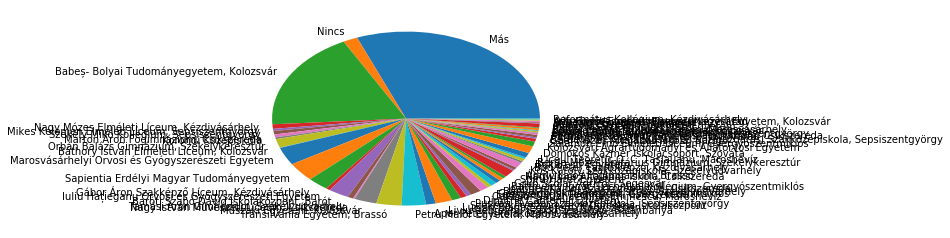

In [38]:
plt.pie(iskolak.values(),labels=[(i) for i in iskolak.keys()])
plt.show()

In [39]:
for d in data:
    if "studwhere" in d:
        s = studdict(d["studwhere"]) 
        d["studwhere"] = s
        
print(data[:20])

[{'id': 0, 'birth': 'keresztur', 'name': 'boholt lore', 'studwhere': 'Más', 'livesin': 'szèkelykeresztur, harghita, romania'}, {'id': 1, 'livesin': 'csikszentdomokos', 'other1': 'venczel józsef iskolaközpont - csíkszereda', 'birth': 'csikszereda', 'name': 'nelut kémenes'}, {'marriedto': 'péterfy eniko', 'studwhere': 'Nincs', 'livesin': 'angyalföld, budapest, hungary', 'workwhere': 'drogmentes világért alapítvány - magyarország', 'name': 'kovács iulia', 'birth': 'udvarhely', 'id': 2, 'workwhat': 'helyettes ügyvezető'}, {'id': 3, 'name': 'monica-ana szep', 'birth': 'barot', 'livesin': 'budapest, hungary'}, {'birth': 'szentgyorgy', 'name': 'matei szabolcs', 'marriedto': 'lászló tünde', 'id': 4}, {'name': 'rusz angella', 'studwhere': 'Más', 'livesin': 'borzont, harghita, romania', 'workwhere': 'hotel salvator', 'birth': 'csikszereda', 'studwhat': 'dramaturgy', 'id': 5}, {'id': 6, 'name': 'zsolt jakab', 'birth': 'kezdi', 'livesin': 'hollywood'}, {'workwhat': 'former legal practitioner', 'li